In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

Loading Data and printing out basic information

In [2]:
df = pd.read_csv("user_score.csv")

In [79]:
df.head(50)

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8
5,1,Xinil,306,Abenobashi Mahou☆Shoutengai,8
6,1,Xinil,53,Ai Yori Aoshi,7
7,1,Xinil,47,Akira,5
8,1,Xinil,591,Amaenaide yo!!,6
9,1,Xinil,54,Appleseed (Movie),7


Total amount of data that we have got, this consists of ratings that different users have given on different anime

In [5]:
len(df)

24325191

The total unique Anime count and the Total use count.


In [6]:
print(f"Total Anime count :: {len(df["anime_id"].unique())}")
print(f"Total Users :: {len(df['user_id'].unique())}")

Total Anime count :: 16500
Total Users :: 270033


EDA to remove users who have rated less than 20 anime. 

The Dataset loaded has more than 2 million data

New Dataset :: Only keeping 400000 data for easier computation and memory management

In [58]:
from sklearn.model_selection import train_test_split
new_df = df[:400000]
train,test = train_test_split(new_df,test_size=0.2,random_state=42)

In [59]:
rating_matrix = pd.pivot_table(train,index="user_id",columns="anime_id",values="rating")

In [60]:
rating_matrix=rating_matrix[rating_matrix.notnull().sum(axis=1)>= 20] # leaving out the ones where the user have rated less than 20 anime

In [61]:
rating_matrix

anime_id,1,5,6,7,8,15,16,17,18,19,...,54738,54775,54782,54856,55016,55077,55183,55339,55351,55610
user_id,,,,,,,,,,,,,,,,,,,,,
1,10.0,NaN,10.0,9.0,6.0,7.0,8.0,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,9.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,9.0,8.0,8.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,8.0,8.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4844,10.0,7.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Basic filtering to remove any rating that is rated by less than enough people

From this scatterplot we can see that, the avg rating is 7 - 9 for an anime beacuse we see more count of user rating an anime from range of 7 to 9.

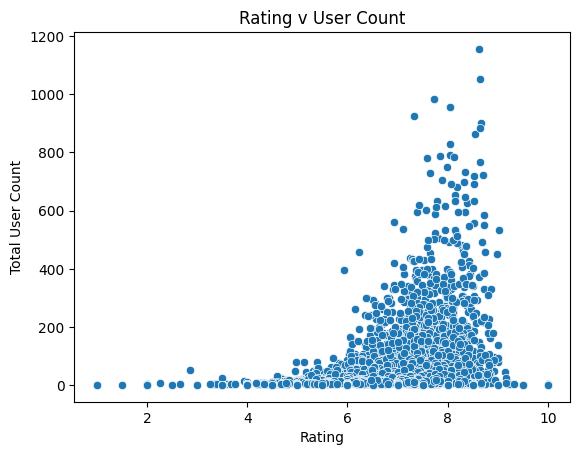

In [62]:
sns.scatterplot(x=rating_matrix.mean(axis=0),y=rating_matrix.notnull().sum(axis=0))
plt.xlabel("Rating")
plt.ylabel("Total User Count")
plt.title("Rating v User Count")
plt.show()

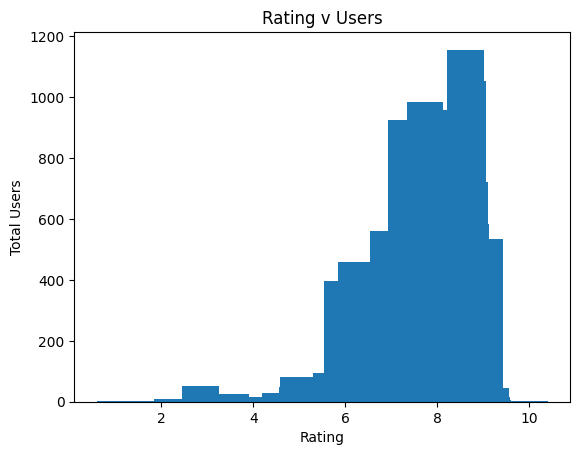

In [63]:
plt.bar(x=rating_matrix.mean(axis=0),height=rating_matrix.notnull().sum(axis=0))
plt.xlabel("Rating")
plt.ylabel("Total Users")
plt.title("Rating v Users")
plt.show()

The point of this graph is to show what is the mean rating each anime has gotten, and how many people gave the anime that rating. 

Now, We Normalize the Data by subtracting it with its mean

In [64]:
mean_rating = rating_matrix.mean(axis=0)
rating_matrix_normalized = rating_matrix.subtract(mean_rating,axis=1)

In [65]:
rating_matrix_normalized.head(5)

anime_id,1,5,6,7,8,15,16,17,18,19,...,54738,54775,54782,54856,55016,55077,55183,55339,55351,55610
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.338889,NaN,1.849923,1.632399,-0.924242,-0.611429,-0.429907,NaN,-0.164948,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,-0.340604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,-0.150077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,0.338889,-0.340604,-0.150077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,0.338889,-0.340604,-0.150077,NaN,NaN,-0.611429,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, to get the similaity score -  we use Pearson similarity in this 

Now to calculate the correaltion of the data

In [66]:
rating_matrix_pearson = rating_matrix_normalized.T.corr(method="pearson")

All the values are in range of 1 to -1

In [67]:
rating_matrix_pearson.head(50)

user_id,1,4,9,20,23,37,47,48,53,66,...,4829,4830,4831,4832,4833,4837,4841,4844,4846,4848
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.031219,0.358920,0.140189,-0.135097,-0.014842,-0.107303,-0.053689,-0.561652,-0.130429,...,0.293085,0.115238,-0.022315,-0.114381,-0.250797,-0.279872,-0.000237,0.284469,0.168213,-0.229102
4,0.031219,1.000000,-0.042864,-0.376340,-0.090026,0.531412,0.262534,0.140230,-1.000000,0.110076,...,-0.077887,0.107868,0.842715,-0.191934,-0.195381,-0.270588,-0.048120,0.372559,0.055430,0.503280
9,0.358920,-0.042864,1.000000,-0.112576,-0.328753,0.207190,0.196182,-0.321537,-0.408613,0.101196,...,-0.357904,-0.680232,-0.124229,-0.028081,-0.096162,-0.331019,0.594843,0.217265,0.176808,-0.148999
20,0.140189,-0.376340,-0.112576,1.000000,0.109719,0.403469,0.240875,0.182906,0.808248,-0.235212,...,-0.086179,-0.247770,-0.374344,0.208953,0.051073,-0.086815,-0.358763,-0.130942,0.534956,-0.055798
23,-0.135097,-0.090026,-0.328753,0.109719,1.000000,0.311370,0.196658,0.105128,-0.886291,-0.036018,...,-0.414130,0.238270,-0.020849,0.191957,-0.177755,-0.002356,-0.614115,-0.343341,-0.169418,0.365925
37,-0.014842,0.531412,0.207190,0.403469,0.311370,1.000000,0.269076,0.354516,-0.702204,0.226037,...,-0.206077,-0.334749,0.010711,0.022645,-0.999348,-0.135121,NaN,0.553658,0.171940,0.270720
47,-0.107303,0.262534,0.196182,0.240875,0.196658,0.269076,1.000000,0.150328,-0.576229,0.260984,...,-0.250185,-0.093891,-0.275515,0.015898,0.496080,-0.074282,-0.398888,0.506512,0.060413,0.105410
48,-0.053689,0.140230,-0.321537,0.182906,0.105128,0.354516,0.150328,1.000000,-0.071901,0.095680,...,-0.042563,0.269848,0.296763,0.083176,-0.162017,-0.222115,0.112897,-0.229091,-0.054573,0.169089
53,-0.561652,-1.000000,-0.408613,0.808248,-0.886291,-0.702204,-0.576229,-0.071901,1.000000,0.252572,...,0.295352,-1.000000,0.335838,0.378511,-0.169782,0.075579,1.000000,-0.201386,-0.351707,-0.181527


Since the dataset contains NAN values which is not useful for Nearest Neighbour, unsupervised learning to produce users with similar rating as the target user. 

To avoid that we use KNNImputer to convert the NAN values to values that is close the value that is close to the value of its nearest neighbour

In [68]:
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer

Setting number of neighbour as 10 , as i want 10 different user which have similar rating to the target user. 


In [69]:
knn = NearestNeighbors(n_neighbors=10,metric="minkowski")
impute = KNNImputer(n_neighbors=10,weights="distance")

In [70]:
rating_matrix_imputed = pd.DataFrame(impute.fit_transform(rating_matrix_pearson), 
                                     columns=rating_matrix_pearson.columns)

In [71]:
rating_matrix_imputed.index = range(1, len(rating_matrix_imputed) + 1)


In [72]:
knn.fit(rating_matrix_imputed)

NearestNeighbors(n_neighbors=10)

In [73]:
distance, indices = knn.kneighbors(rating_matrix_imputed,n_neighbors=10)

These are the distances and the user _id of the target user and the user that is similar to the user based on the rating

In [74]:
for i in range(len(distance)):
    print(f"{distance[i]} :: {indices[i]}")

[1.68587394e-07 1.28945865e+01 1.30942930e+01 1.31224879e+01
 1.32062340e+01 1.34365963e+01 1.35292735e+01 1.35663983e+01
 1.36068189e+01 1.37038873e+01] :: [   0  265  101 1307  553  145 1070 1190 1185 1959]
[ 0.         19.02740773 19.04953966 19.24633913 19.39754385 19.53815676
 19.66029198 19.77294151 19.88111618 19.92145927] :: [   1  101 1002  553  995  777 1580 1336  307  133]
[ 0.         19.92149171 20.31721934 20.51413782 20.55350163 20.61122831
 20.6205106  20.65908279 20.82111417 20.92876723] :: [   2  377   73  206 1531  547  216   80  287  991]
[ 0.         15.54046767 16.11820015 16.6735573  16.80545856 16.85136307
 16.86144226 16.91922375 16.97706741 17.02451752] :: [   3 1981  553  683  500  335  550  205  265 1153]
[2.38418579e-07 1.52491163e+01 1.56885435e+01 1.57072946e+01
 1.57209983e+01 1.60265383e+01 1.60842238e+01 1.62731851e+01
 1.62821789e+01 1.62909770e+01] :: [   4  516 1372  683  823  463  847  108 1162   65]
[ 0.         22.92842946 22.92882835 22.9801165 

Now, as we have the user distance and the similar user. We now need to get recommendation to the target user on what anime to watch based on the similar user ratings. 


Step 1 : Anime name contains the name of all the anime and its anime id

Step 2 : Get the similar users to the target user and the distance

Step 3 : We need to get inverse weight and add in a small value in order to not get null values 

Step 4 : Now we need the rating for the users similar to the target user from the main rating matrix

Step 5 : We need to get the weight of rating that we can achieve by first transposing the matric and multiplying by the inverse weight

Step 6 : Now, we predict the rating that the target user might like by dividing by the inverse weight

Step 7 : We also need to get the target user rating from the rating matrix

Step 8 : Now we get the anime Id which the user has not rated

Step 9 : We now use the predicted rating that we got in step 6, and filter it to the unwatched anime by target user

Step 10 : Now that we have the anime id of the unwatched anime, we sort it from highest predicted rating to less and only take 10 of those anime id

Step 11 : Now, by mapping it to the anime name dict we have, we get the name of anime from anime id we got from step 10.

Step 12 : We return the anime name that user might like based on similar rating from other user

In [75]:
anime_name = df.set_index('anime_id')['Anime Title'].to_dict()
def get_recommendations(user_id):
    neighbours_nearest_id = indices[user_id]
    neighbours_nearest_id = neighbours_nearest_id[1:10]
    neighbours_nearest_distances = distance[user_id]
    neighbours_nearest_distances = neighbours_nearest_distances[1:10]
    
    inverse_weight = 1 /(neighbours_nearest_distances + 1e-5)
    ratings_n = rating_matrix.iloc[neighbours_nearest_id]
    ratings_weight = (ratings_n.T * inverse_weight).T
    predict_rating = ratings_weight.sum(axis=0)/inverse_weight.sum()
    
    target_user_rating = rating_matrix.iloc[user_id]
    anime_unrated = target_user_rating[target_user_rating.isna()]
    
    recommendation = predict_rating[anime_unrated.index].sort_values(ascending=False)
    recommendation_s = pd.Series(recommendation)
    recommendation_s.index = recommendation_s.index.map(anime_name.get)
    recommendation_df = pd.DataFrame(recommendation_s,columns=["predicted_rating"])
    recommendation_df.index.name = "Anime Title"
    return recommendation_df.head(10)

Since the index starts from 0, while gettting the recommendation for user id 1, we need to enter 0 to get the recommendation for user id 1.

For each user id, we need to enter user id 1 less than the original user id. 

In [76]:
get_recommendations(0)

,predicted_rating
Anime Title,
Higashi no Eden,8.120810
Perfect Blue,7.456801
Monster,7.329625
Fullmetal Alchemist,7.242898
Toki wo Kakeru Shoujo,7.109033
Kimi ni Todoke,7.082012
Durarara!!,6.927382
Angel Beats!,6.793592
Suzumiya Haruhi no Shoushitsu,6.770729


In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score

actual_ratings = []
predicted_ratings = []

for row in test.itertuples(index=False, name='TestRow'):
    user_id = row.user_id
    anime_id = row.anime_id
    actual_rating = row.rating
    recommendations = get_recommendations(1) 
    if anime_name.get(anime_id) in recommendations.index: 
        predicted_rating = recommendations.loc[anime_name.get(anime_id), 'predicted_rating']
        actual_ratings.append(actual_rating)
        predicted_ratings.append(predicted_rating)
rmse = mean_squared_error(actual_ratings, predicted_ratings, squared=False)
mae = mean_absolute_error(actual_ratings, predicted_ratings)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
threshold = 7
actual_relevance = [1 if rating >= threshold else 0 for rating in actual_ratings]
predicted_relevance = [1 if rating >= threshold else 0 for rating in predicted_ratings]
precision = precision_score(actual_relevance, predicted_relevance, zero_division=1)
recall = recall_score(actual_relevance, predicted_relevance, zero_division=1)
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


RMSE: 1.7435561274584195
MAE: 1.4386442086967761
Precision: 0.914572864321608
Recall: 0.6518624641833811
F1 Score: 0.7611877875365956


c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
